## Stats Notes

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

### Discrete Uniform Distributions

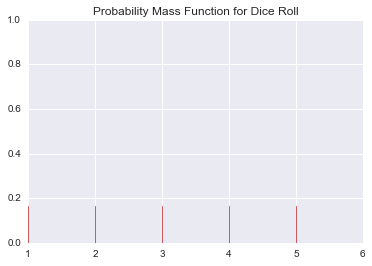

In [2]:
roll_options = [1,2,3,4,5,6]

tprob = 1

prob_roll = tprob / len(roll_options)

uni_plot = sns.rugplot(roll_options,height=prob_roll,c='indianred')

uni_plot.set_title('Probability Mass Function for Dice Roll')

In [3]:
from scipy.stats import randint

low,high = 1,7

mean,var = randint.stats(low,high)

print('The mean is %2.1f' %mean)
print('The variance is %2.1f' %var)

The mean is 3.5
The variance is 2.9


<Container object of 6 artists>

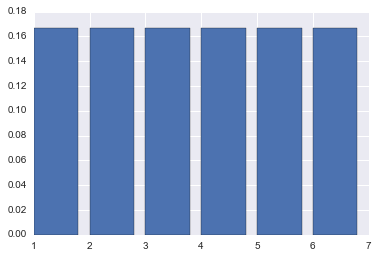

In [4]:
plt.bar(roll_options,randint.pmf(roll_options,low,high))

### Continuous Uniform Distributions

In [5]:
low, high = 19,27
fx = 1/(high-low)
print('The probability density function results in %1.2f' %fx)
var = ((high-low)**2)/12
print('The variance of the continous uniform distribution is %1.1f' %var)

The probability density function results in 0.12
The variance of the continous uniform distribution is 5.3


In [6]:
fx_1 = 27.0/(high-low)
fx_2 = 25.0/(high-low)
ans = fx_1 - fx_2
print('The probability that the taxi ride will last at least 25 minutes is %2.1f%%' %(100*ans))

The probability that the taxi ride will last at least 25 minutes is 25.0%


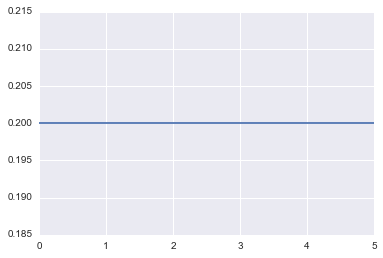

In [7]:
from scipy.stats import uniform

A,B = 0,5

x = np.linspace(A,B,100)

rv = uniform(loc=A,scale=B)

plt.plot(x,rv.pdf(x))

### Binomial Distribution

In [8]:
p_A = .72
n_A = 11
k = 6

import scipy.misc as sc

comb_A = sc.comb(n_A,k)

answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

answer_A = 100*answer_A

p_B = .48
n_B = 15

comb_B = sc.comb(n_B,k)

answer_B = comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

answer_B = 100*answer_B

print('The probability of player A making 6 shots in an average game is %1.1f%%' %answer_A)
print('The probability of player B making 6 shots in an average game is %1.1f%%' %answer_B)

The probability of player A making 6 shots in an average game is 11.1%
The probability of player B making 6 shots in an average game is 17.0%


In [9]:
k = 9

comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))
print('The probability of player A making 9 shots in an average game is %1.1f%%' %answer_A)
print('The probability of player B making 9 shots in an average game is %1.1f%%' %answer_B)

The probability of player A making 9 shots in an average game is 22.4%
The probability of player B making 9 shots in an average game is 13.4%


In [10]:
mu_A = n_A * p_A
mu_B = n_B * p_B
sigma_A = (n_A * p_A * (1-p_A)) ** 0.5
sigma_B = (n_B * p_B * (1-p_B)) ** 0.5

print('Player A will make an average of %1.0f +/- %1.0f shots per game' %(mu_A,sigma_A))
print('Player B will make an average of %1.0f +/- %1.0f shots per game' %(mu_B,sigma_B))

Player A will make an average of 8 +/- 1 shots per game
Player B will make an average of 7 +/- 2 shots per game


In [11]:
from scipy.stats import binom

mean,var = binom.stats(n_A,p_A)

print mean
print var**0.5

7.92
1.48916083752


In [12]:
n=10
p=0.5

x = range(n+1)

Y = binom.pmf(x,n,p)

Y

array([ 0.00097656,  0.00976563,  0.04394531,  0.1171875 ,  0.20507813,
        0.24609375,  0.20507813,  0.1171875 ,  0.04394531,  0.00976563,
        0.00097656])

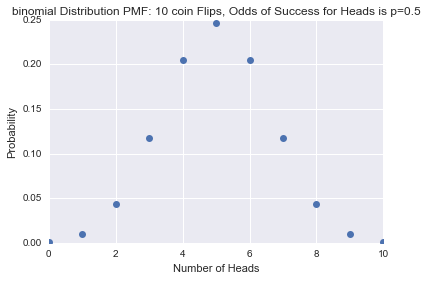

In [13]:
plt.plot(x,Y,'o')
plt.title('binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

### Poisson Distribution

In [15]:
lamb = 10
k = 7

from math import exp
from math import factorial

prob = (lamb**k)*exp(-lamb)/factorial(k)

print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush.' %(100*prob))

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush.


In [16]:
from scipy.stats import poisson
mu = 10

mean,var = poisson.stats(mu)

odds_seven = poisson.pmf(7,mu)

print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven))

print('The mean is %2.2f and variance is %2.2f' %(mean,var))

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00 and variance is 10.00


<Container object of 30 artists>

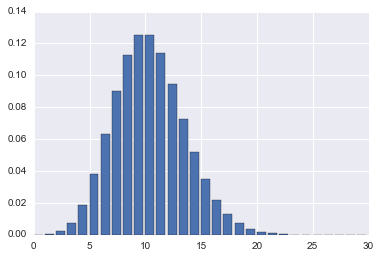

In [19]:
k=np.arange(30)
lamb = 10

pmf_pois = poisson.pmf(k,lamb)

plt.bar(k,pmf_pois)

In [21]:
k,mu = 10,10

prob_up_to_ten = poisson.cdf(k,mu)

print('The probability that 10 or less customers showup is %2.1f %%.' %(100*prob_up_to_ten))

The probability that 10 or less customers showup is 58.3 %.


In [22]:
prob_more_than_ten = 1 - prob_up_to_ten

print('The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten))

The probability that more than ten customers show up during lunch rush is 41.7 %.


### Normal Distribution

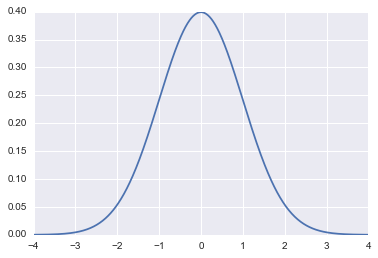

In [29]:
mean = 0

std = 1

X = np.arange(-4,4,0.01)

Y = stats.norm.pdf(X,mean,std)

plt.plot(X,Y)

In [30]:
mu,sigma = 0,0.1
norm_set = np.random.normal(mu,sigma,1000)

(array([  1.,   1.,   0.,   1.,   2.,   0.,   2.,   0.,   1.,   3.,   6.,
          6.,   6.,  15.,  11.,  16.,  14.,  25.,  28.,  36.,  30.,  52.,
         35.,  55.,  57.,  72.,  53.,  49.,  46.,  35.,  58.,  45.,  42.,
         40.,  29.,  32.,  25.,  17.,   8.,  13.,   6.,   8.,   4.,   6.,
          1.,   2.,   2.,   1.,   2.,   1.]),
 array([-0.36351631, -0.349837  , -0.33615769, -0.32247838, -0.30879908,
        -0.29511977, -0.28144046, -0.26776116, -0.25408185, -0.24040254,
        -0.22672323, -0.21304393, -0.19936462, -0.18568531, -0.17200601,
        -0.1583267 , -0.14464739, -0.13096808, -0.11728878, -0.10360947,
        -0.08993016, -0.07625085, -0.06257155, -0.04889224, -0.03521293,
        -0.02153363, -0.00785432,  0.00582499,  0.0195043 ,  0.0331836 ,
         0.04686291,  0.06054222,  0.07422152,  0.08790083,  0.10158014,
         0.11525945,  0.12893875,  0.14261806,  0.15629737,  0.16997668,
         0.18365598,  0.19733529,  0.2110146 ,  0.2246939 ,  0.23837321,
 

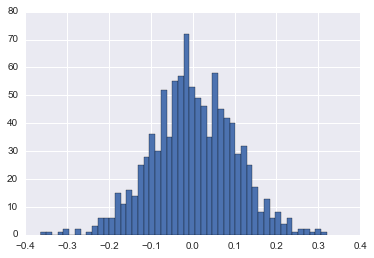

In [31]:
plt.hist(norm_set,bins=50)

### T Distribution

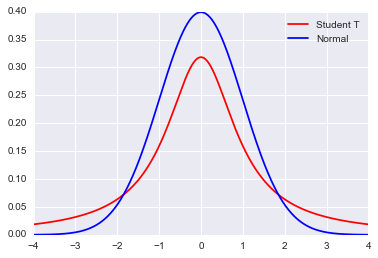

In [47]:
x = np.arange(-4,4,0.01)

rv = stats.t(1)
nm = stats.norm.pdf(x,0,1)

plt.plot(x,rv.pdf(x),c='r',label='Student T')
plt.plot(x,nm,c='b',label='Normal')
plt.legend()

### Hypothesis Testing